In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError


In [ ]:
df = pd.read_csv('/content/supply_chain_data.csv')
print("Preview:\n", df.head())


Preview:
   Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29

In [ ]:
df = df.drop(columns=['SKU', 'Supplier name'])

In [ ]:
df = df.dropna()

In [ ]:
target = 'Number of products sold'
X = df.drop(columns=[target])
y = df[target]


In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
y_pred = model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test, y_pred)
print(f"\n Mean Squared Error on Test Set: {mse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step

 Mean Squared Error on Test Set: 143440.22


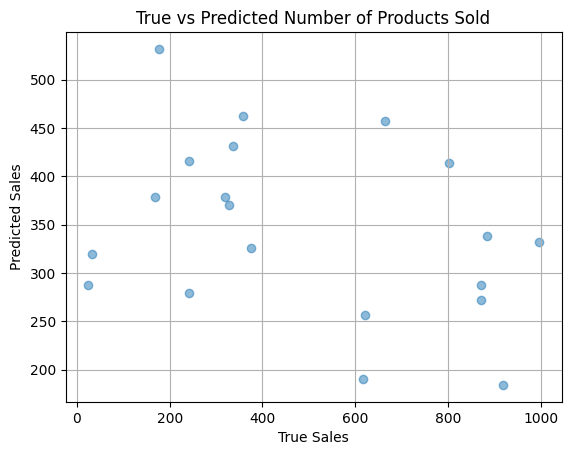

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Sales")
plt.ylabel("Predicted Sales")
plt.title("True vs Predicted Number of Products Sold")
plt.grid(True)
plt.show()


In [ ]:
model.compile(optimizer='adam', loss=MeanSquaredError())

# Train the model (same as before)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, verbose=0)

# Save the model in the recommended .keras format
model.save("demand_forecasting_model.keras")

# Load the model later (no errors expected)
loaded_model = keras.models.load_model("demand_forecasting_model.keras")

# Predict using a random row from dataset
sample = X.sample(1, random_state=1)
scaled_sample = scaler.transform(sample)
predicted_sales = loaded_model.predict(scaled_sample)[0][0]

print("\n Sample Input for Prediction:")
print(sample)
print(f"\n Forecasted Number of Products Sold: {predicted_sales:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

 Sample Input for Prediction:
        Price  Availability  Revenue generated  Stock levels  Lead times  \
80  91.128318            75        8651.672683            39          14   

    Order quantities  Shipping times  Shipping costs  Lead time  \
80                41               2        2.833185          8   

    Production volumes  ...  Location_Delhi  Location_Kolkata  \
80                 202  ...           False             False   

    Location_Mumbai  Inspection results_Pass  Inspection results_Pending  \
80            False                    False                       False   

    Transportation modes_Rail  Transportation modes_Road  \
80                      False                      False   

    Transportation modes_Sea  Routes_Route B  Routes_Route C  
80                      True            True           False  

[1 rows x 32 columns]

 Forecasted Number of Products Sold: 78.92
